# Simpon's rule
In this notebook we look at a more efficient method for numerical integraiton: Simpon's rule

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [34]:
def NIntegrate(f, a, b, N, method='Simpsons'):
    dx = (b-a)/N
    xi = a
    i = 0
    area = 0
    while i < N:
        if(method == 'Simpsons'):
            area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        elif(method == 'midpoint'):
            area += dx * f(xi+dx/2)
        elif(method = 'trapezoidal'):
            area +=  dx/2 * (f(xi) + f(xi+dx))
        xi += dx
        i+= 1
    return area

In [37]:
def f(x):
    return np.sin(x)

In [46]:
NIntegrate(f, 0, 4, 10, 'midpoint')

1.664719576238408

In [51]:
I = 1 - np.cos(4)
imax = 10;

errMidpoint = np.empty((imax,2))
errTrap     = np.empty((imax,2))
errSimpsons = np.empty((imax, 2))

i = 0
N = 10
while i < imax:
    errMidpoint[i,0] = N
    errMidpoint[i,1] = np.abs(NIntegrate(f, 0, 4, N, 'midpoint') - I)
    
    errTrap[i, 0] = N
    errTrap[i, 1] = np.abs(NIntegrate(f, 0, 4, N, 'trapezoidal') - I)
    
    errSimpsons[i, 0] = N
    errSimpsons[i, 1] = np.abs(NIntegrate(f, 0, 4, N, 'Simpsons') - I)
    
    N *= 2
    i += 1

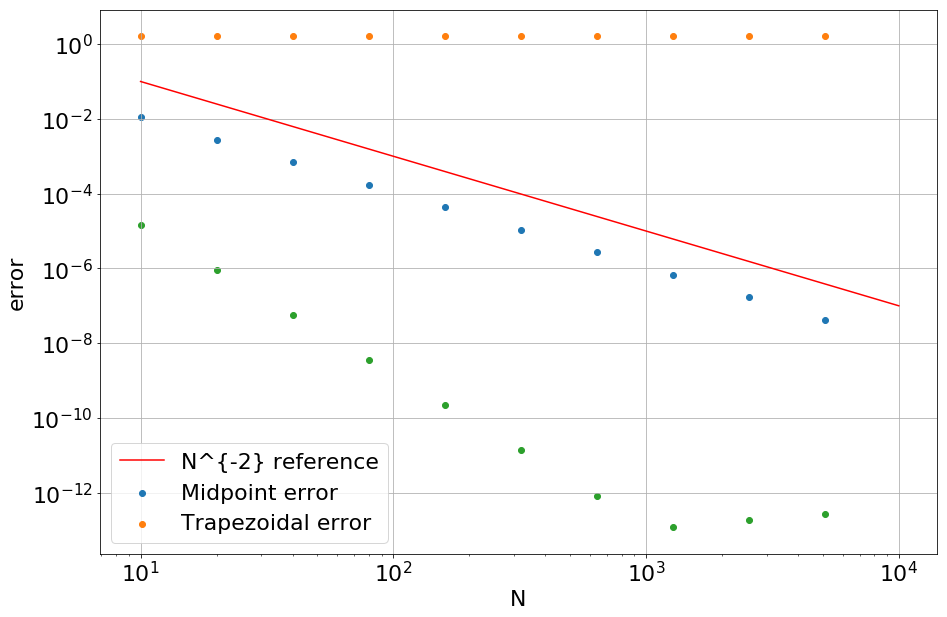

In [52]:
x = np.linspace(10,1e4)
N2ref = 10*x**-2


plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.scatter(errMidpoint[:,0], errMidpoint[:,1]);
plt.scatter(errTrap[:,0], errTrap[:,1]);
plt.scatter(errSimpsons[:,0], errSimpsons[:,1]);
plt.plot(x,N2ref, color='red')
plt.legend(['N^{-2} reference','Midpoint error', 'Trapezoidal error']);